In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/var/folders/0p/nmvxp1px72q3ml7745bcbn9m0000gn/T/ipykernel_32191/2969453729.py:2: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_handlebar_acc = pd.read_csv('../data/combined/handlebar_acc.csv')


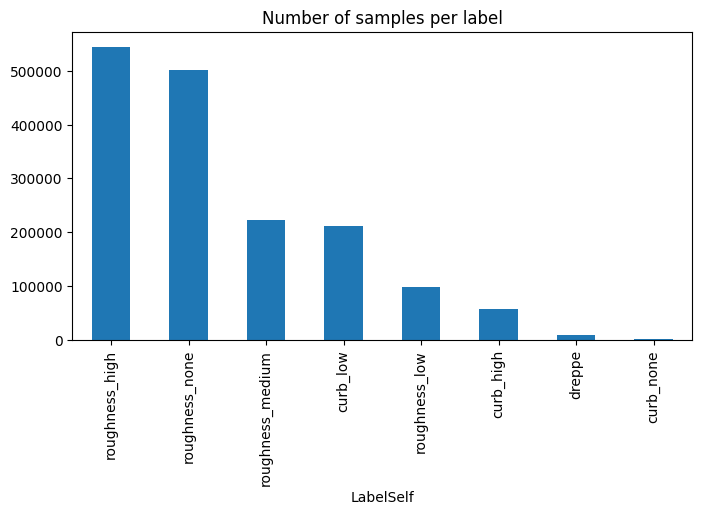

num samples after resampling: 4504


,Acc-X,Acc-Y,Acc-Z,LabelSelf,LabelOther
NTP,,,,,
2024-05-28 15:21:46,-0.118092,1.650410,10.432173,roughness_medium,roughness_medium
2024-05-28 15:21:47,0.138077,2.208235,9.764220,roughness_medium,roughness_medium
2024-05-28 15:21:48,0.109348,2.315970,9.958142,roughness_medium,roughness_medium
2024-05-28 15:21:49,-0.276102,3.161086,8.720393,roughness_medium,roughness_medium
2024-05-28 15:21:50,1.315974,4.461082,6.965518,roughness_medium,roughness_medium


In [71]:
# read raw data and set NTP as datetime index
df_handlebar_acc = pd.read_csv('../data/combined/handlebar_acc.csv')
df_handlebar_acc['NTP'] = pd.to_datetime(df_handlebar_acc['NTP'])
df_handlebar_acc.set_index('NTP', inplace=True)

# forward fill the labels
df_handlebar_acc[['LabelSelf', 'LabelOther']] = df_handlebar_acc[['LabelSelf', 'LabelOther']].ffill()

# bar plot of the number of samples per label
df_handlebar_acc['LabelSelf'].value_counts().plot(kind='bar', title='Number of samples per label', figsize=(8, 4))
plt.show()

# resample to 1 second
df_handlebar_acc = df_handlebar_acc.resample('1s').first()

print(f'num samples after resampling: {len(df_handlebar_acc)}')
df_handlebar_acc.head()

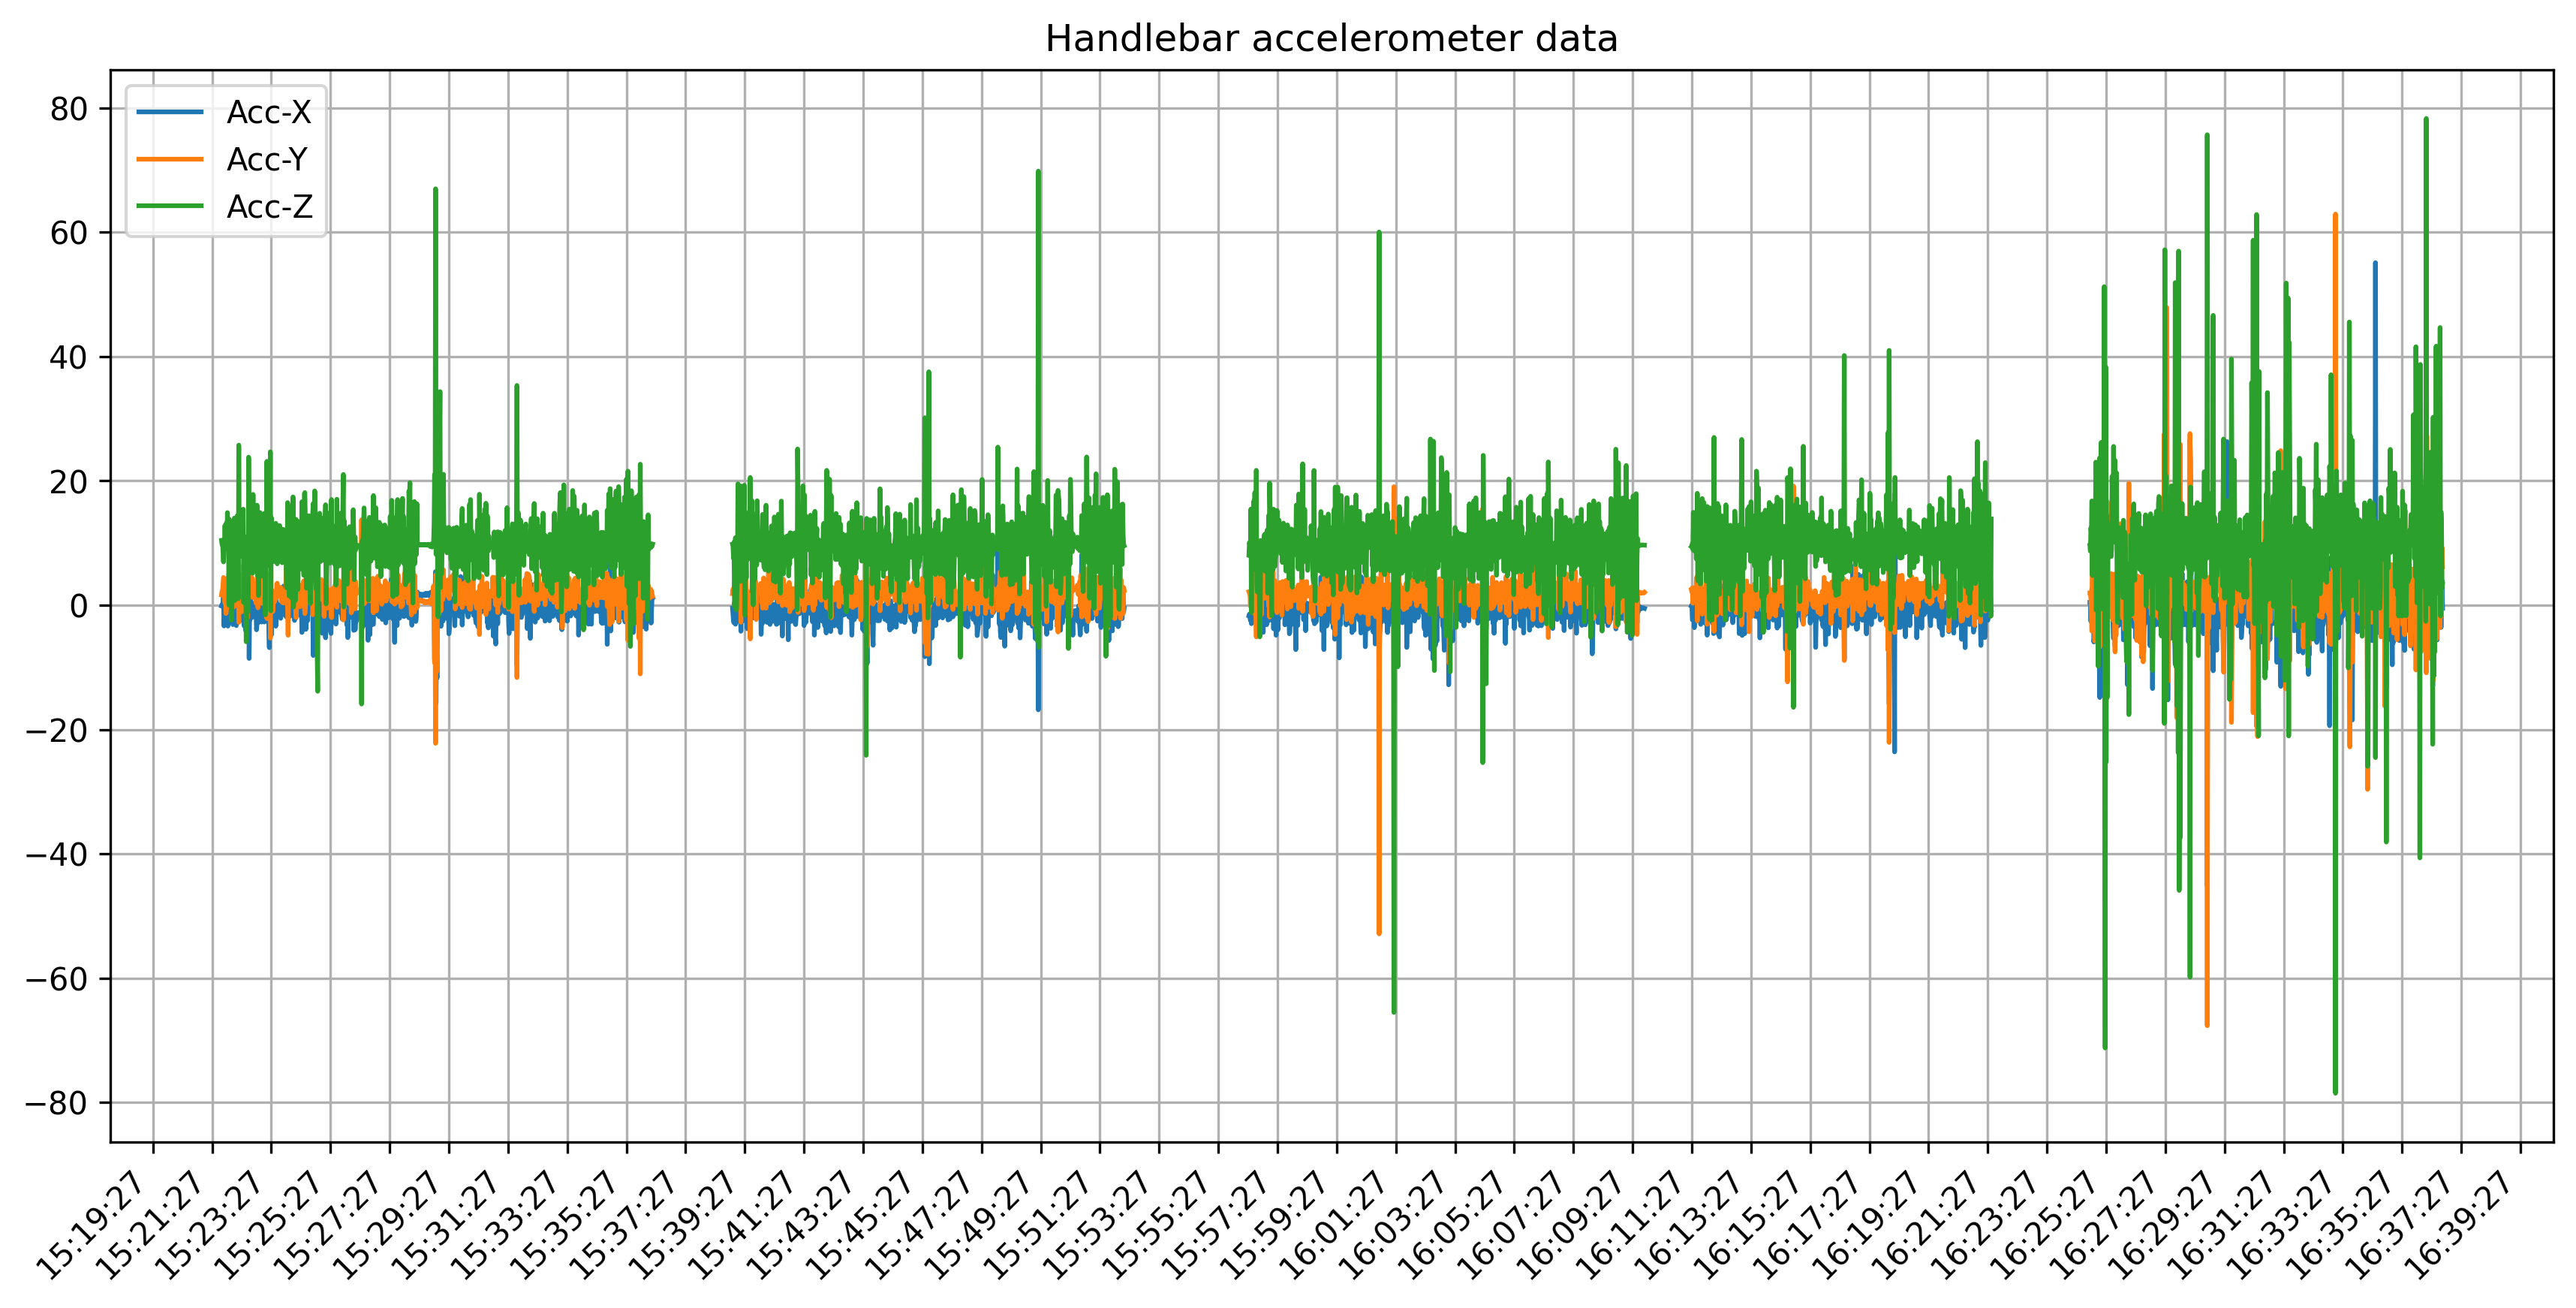

In [61]:
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Handlebar accelerometer data')
plt.plot(df_handlebar_acc.index, df_handlebar_acc['Acc-X'], label='Acc-X')
plt.plot(df_handlebar_acc.index, df_handlebar_acc['Acc-Y'], label='Acc-Y')
plt.plot(df_handlebar_acc.index, df_handlebar_acc['Acc-Z'], label='Acc-Z')
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=120))
plt.show()

In [73]:
df_handlebar_acc[['Acc-X', 'Acc-Y', 'Acc-Z']].describe()

,Acc-X,Acc-Y,Acc-Z
count,3798.000000,3798.000000,3798.000000
mean,-0.672905,2.066843,9.490913
std,2.977493,3.821340,7.297360
min,-45.203760,-67.658750,-78.532540
25%,-1.860995,0.683793,6.762020
50%,-0.642399,2.058604,9.596633
75%,0.597145,3.414262,12.266652
max,55.116160,62.936943,78.314445


<Axes: ylabel='Frequency'>

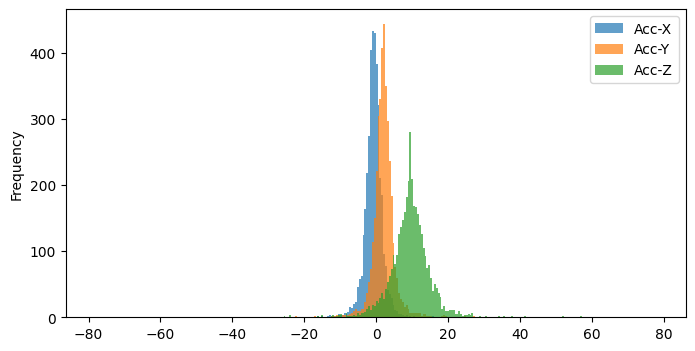

In [91]:
# distribution of the accelerometer data
df_handlebar_acc[['Acc-X', 'Acc-Y', 'Acc-Z']].plot(kind='hist', bins=300, alpha=0.7, figsize=(8, 4))

<Axes: xlabel='NTP'>

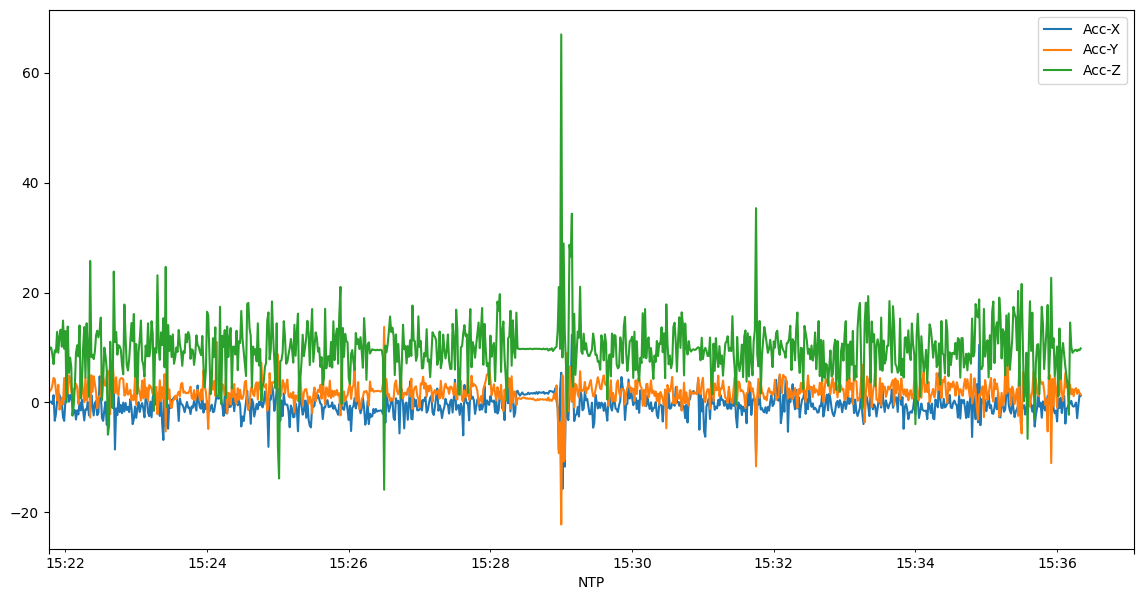

In [107]:
df_handlebar_acc[['Acc-X', 'Acc-Y', 'Acc-Z']][:920].plot(kind='line', figsize=(14, 7))